In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import IPython.display as ipd
from librosa import display
import librosa

In [6]:
dir1="C:\\Users\\tlsck\\IMPRESS\\Data\\UrbanSound8K\\metadata\\UrbanSound8K.csv"
dir2="C:\\Users\\tlsck\\IMPRESS\\Data\\UrbanSound8K"
data=pd.read_csv(dir1)
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [10]:
#feature set
#This file is of a dog bark
y,sr=librosa.load(dir2+"\\audio\\fold5\\100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape
ipd.Audio(y,rate=sr)

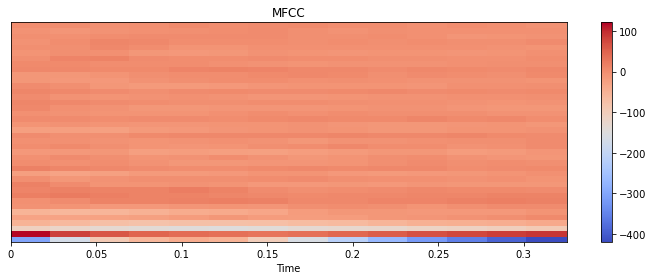

In [6]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

C:\Users\tlsck\Anaconda3\envs\study\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\tlsck\Anaconda3\envs\study\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


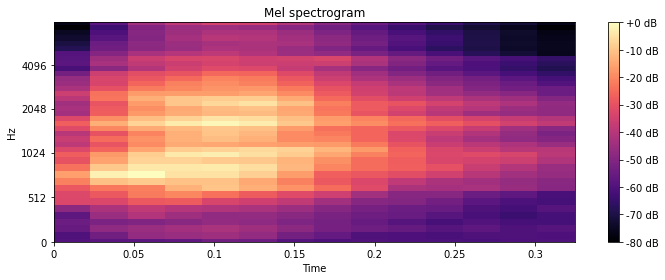

In [7]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

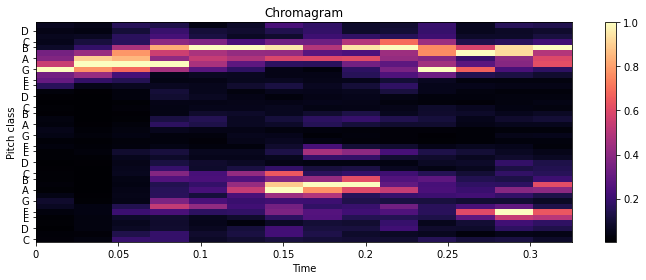

In [8]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

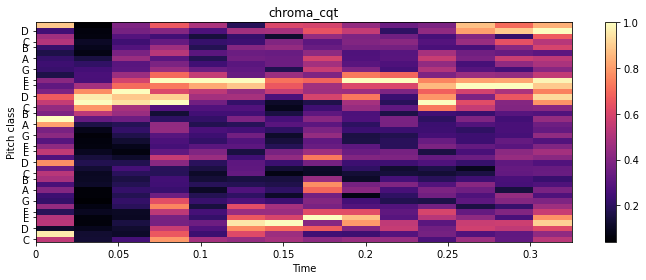

In [9]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

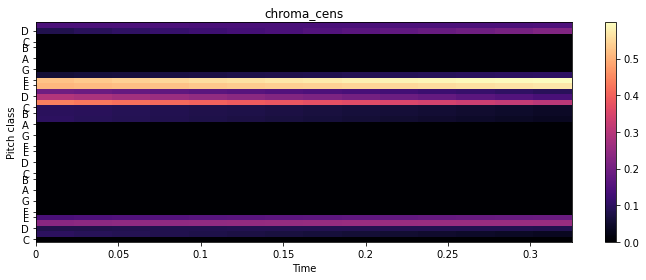

In [10]:

#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [15]:
#feature set
y,sr=librosa.load(dir2+"\\audio\\fold5\\100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape
ipd.Audio(y,rate=sr)

In [22]:

#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

(40, 5)

In [23]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path=dir2+"\\audio\\fold"
for i in tqdm(range(len(data))):
    a=fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"\\"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)
      


100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [16:24<00:00,  8.87it/s]


In [24]:

#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path=dir2+"\\audio\\fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"\\"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [38:49<00:00,  3.75it/s]


In [25]:

len(x_train)+len(x_test)

8732

In [26]:
len(data)

8732

In [27]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40, 5), (837, 40, 5), (7895,), (837,))

In [28]:

#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 200), (837, 200))

In [29]:

#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")